# Sweep laser pointer across the Moon from Earth

## Scenario
A laser pointer on earth is pointed towards the Moon and swept across the Moon surface along a a straight line left to right. The laser hits the Moon along a circle through the center of the observable Moon disk. 

The calculations use spherical coordinates on the Moon such that line of incidence is zero altitude and sweeps from positive to negative latitude.

## Plan 
Use SymPy to:
1. Derive formula for distance Earth - Moon surface as a function of the sweep angle from Earth perspective
2. Derive formula for the arrival time as a function of the sweep angle, under consideration of the sweep angular speed

Plot the following:
- Arrival time vs sweep angle or start time when photon left the laser pointer
- Moon surface location (latitude( vs sweep angle or start time
...


In [75]:
import sympy
from sympy import *

# Parameters for the calculations

c = symbols('c', positive=True ) # Speed of light in vacuum
R = symbols('R', positive=True ) # Radius of the target sphere (Moon)
D = symbols('D', positive=True ) # Distance laser pointer to target sphere center (Earth to Moon center)
alpha = symbols('alpha')         # Angle of laser pointer direction
omega = symbols('omega')         # Angular velocity of laser pointer sweep movement
T = symbols('T')                 # Sweep duration
L = symbols('L', positive=True ) # Flight path length (distance Earth - Moon surface point)
a, b = symbols('a b')            # Coordinates of target sphere (Moon) surface point
t = symbols('t')                 # Time in seconds: elapsed time since start of sweep


In [76]:

geometry = solve([a*a + b*b - R*R, a - L*sin(alpha), D - b - L*cos(alpha)], L, a, b)
print( geometry[0] )
print( geometry[1] )
# select the relevant solution (must be less than D) 
pathLength = Lambda(alpha, geometry[0][0])  # define as function of alpha
surfacePointVertical = geometry[0][1]
surfacePointHorizontal = geometry[0][2]
#print(pathLength, surfacePointVertical, surfacePointHorizontal)


(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))
(D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 - sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))


In [77]:
pathLength

Lambda(alpha, D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))

In [78]:
surfacePointHorizontal

D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha)

In [79]:
surfacePointVertical

(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)

In [80]:
# Angle of the surface point
beta = asin(surfacePointVertical/R)
beta

asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R)

In [81]:
# Minimum and maximum ray distances
L_min = D - R
L_max = sqrt(D*D - R*R)

In [82]:
# Maximum/Minimum angle of Moon (full moon appears with angular diameter 2 * alpha_max)
alpha_max = asin(R/D)
alphaStart = alpha_max
alphaEnd = -alpha_max

In [83]:
# Define a function for the surface angle beta with argument alpha
surfaceAngle = Lambda(alpha, beta)
surfaceAngle

Lambda(alpha, asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R))

In [84]:
# Sweep dynamics
# Assumption: t = 0 is start of sweep
sweepAngle = Lambda(t, alphaStart + omega*t)   # Sweep angle as a function of time (sweep from alpha_max to -alpha_max)
sweepAngle

Lambda(t, omega*t + asin(R/D))

In [85]:
# Ray arrival time as function of time
arrivalTime = Lambda(t, t + pathLength(sweepAngle(t))/c)

In [86]:
# Values for Earth - Moon system
speedOfLight = 300000.0      # speed of light in vacuum (km/s)
distanceEarthMoon = 382500.0 # distance Earth - Moon (average) (km)
moonRadius = 1737.5          # Moon radius (km)

# Dictionary for substitution into analytic formulas:
earthMoonSystem = {D: distanceEarthMoon, 
                   R: moonRadius, 
                   c: speedOfLight}


In [87]:
# Replace variables with values for Earth - Moon system
surfaceAngleMoon = surfaceAngle.evalf(subs=earthMoonSystem)
surfaceAngleMoon

Lambda(alpha, asin(0.000575539568345324*(-382500.0*sqrt(2.06341578025546e-5 - sin(alpha)**2) + 382500.0*cos(alpha))*sin(alpha)))

0.00454249928199655 -0.00454249928199655


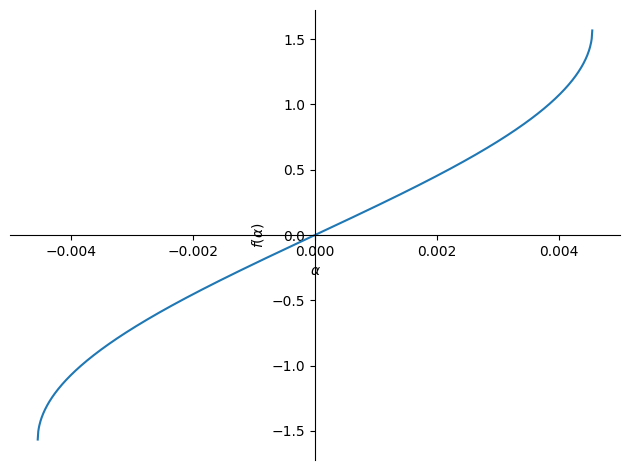

In [88]:
# 
alphaStartMoon = alphaStart.evalf(subs=earthMoonSystem)
alphaEndMoon = alphaEnd.evalf(subs=earthMoonSystem)
print(alphaStartMoon, alphaEndMoon)
plot(surfaceAngleMoon(alpha), (alpha, alphaStartMoon, alphaEndMoon))

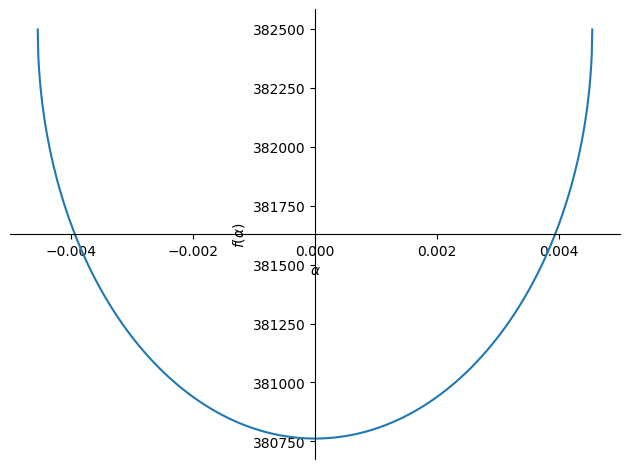

In [89]:
#
pathLengthMoon = pathLength.evalf(subs=earthMoonSystem)
pathLengthMoon

plot(pathLengthMoon(alpha), (alpha, alphaStartMoon, alphaEndMoon))

In [90]:
# Sweep dynamics
angularSpeed = (alphaEnd - alphaStart) / T               # Angular Sweep speed in rad/sec
angularSpeed

-2*asin(R/D)/T

In [91]:
arrivalTime = Lambda(t, t + pathLength(sweepAngle(t))/c) # Arrival time at moon service as function of time
arrivalTime

Lambda(t, t + (D*cos(omega*t + asin(R/D)) - sqrt(-D**2*sin(omega*t + asin(R/D))**2 + R**2))/c)

In [92]:
arrivalTime(0)

D*sqrt(1 - R**2/D**2)/c

In [93]:
# solve(arrivalTime(t) - arrivalTime(0),t)
# no analytical solution

Lambda(t, t - 1.275*(2.06341578025546e-5 - sin(0.90849985639931*t - 0.00454249928199655)**2)**0.5 + 1.275*cos(0.90849985639931*t - 0.00454249928199655))
Max arrival time with image doubling: 0.00571864866213344


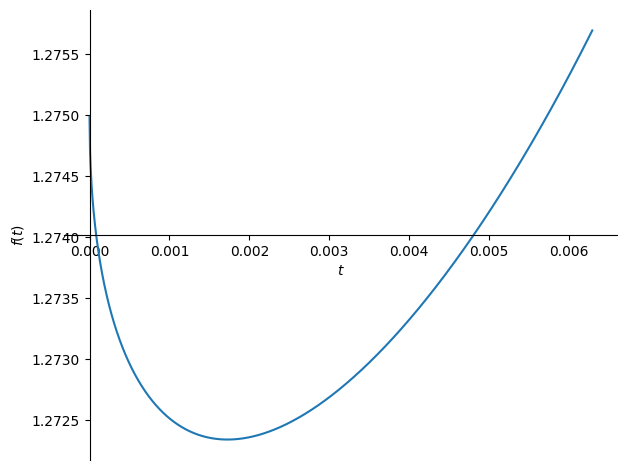

In [94]:
# Arrival time for Earth - Moon system:
sweepDuration = 0.01          # Sweep duration in seconds

# Dictionary for replacing values into formulas
sweepDynamic = {T: sweepDuration, 
                omega: angularSpeed}

# Get Moon arrival time as function of time (= departure time from Earth)
arrivalTimeMoon = arrivalTime.evalf(subs=sweepDynamic).evalf(subs=earthMoonSystem).evalf(subs=sweepDynamic)
print(arrivalTimeMoon)

# The maximum arrival time is for the end of the sweep: 
maxArrivalTimeMoon = sweepDuration + arrivalTimeMoon(0)

# Calculate the time when arrival time is same as arrival time at farthest distance
# This is the maximum arrival time where 2 points have the same arrival time
# Open issue: this numerical solution is returned as a complex number with a very small imaginary part.
# - Have not yet found a way around that other than taking the real part only.
# - Maybe use a SciPy solver (see https://docs.sympy.org/latest/guides/solving/solve-numerically.html)
maxDupTime = re(nsolve(arrivalTimeMoon(t) - arrivalTimeMoon(0), 1)) #without re() it may return a tiny imaginary part
print( 'Max arrival time with image doubling:', maxDupTime )


plot(arrivalTimeMoon(t), (t, 0, maxDupTime*1.1))
#plot(arrivalTimeMoon(t), (t, 0, sweepDuration/7000))

Shortest arrival time: 1.27234301195706


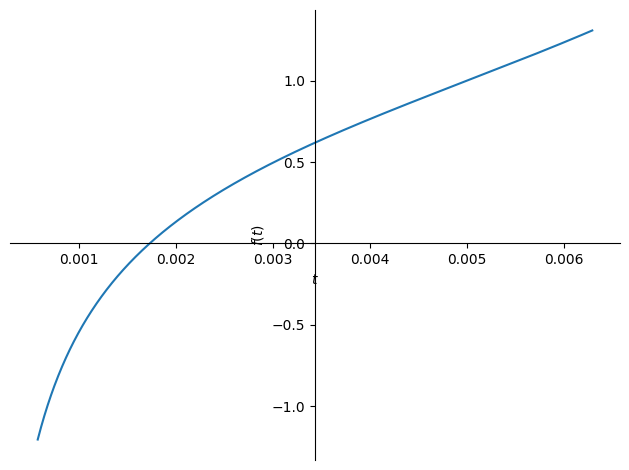

In [95]:
# Calculate shortest arrival time (numerically, no analytic solution)
# Need to set starting range > 0 because derivative is (-) infinite at t = 0
# Issue: some sweep times result in numerical overflows for certain calculations

shortestArrivalTime = arrivalTimeMoon(nsolve(diff(arrivalTimeMoon(t)), (maxDupTime*0.1, maxDupTime*1.1)))
print('Shortest arrival time:', shortestArrivalTime)

plot(diff(arrivalTimeMoon(t), t), (t, maxDupTime*0.1, maxDupTime*1.1))

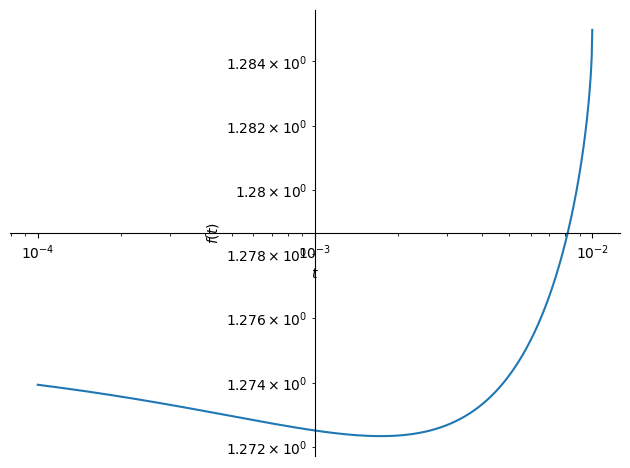

In [96]:

plot(arrivalTimeMoon(t), (t, 0.0001, sweepDuration), xscale='log', yscale='log')


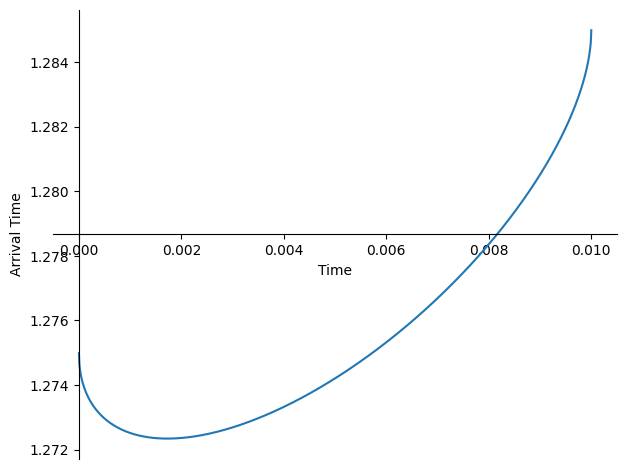

In [97]:
# Full plot of arrival time vs "start time"
plot(arrivalTimeMoon(t), (t, 0, sweepDuration), xlabel='Time', ylabel='Arrival Time')


The following graph shows the laser spot arrival time vs the spot's Moon lattitude. 
The graph illustrates that there is an initial phase where each arrival time has two laser spots at different lattitudes.
This is a parametric plot where the parameter is the start time, i.e. at what time the light left the laser pointer that arrived on the Moon surface. 

This shows the following:
- There is an initial single spot on the moon (shortest arrival time)
- This spot then splits into two spots:
- - One spot moving left, with corresponding start time going backwards towards 0
- - One spot moving right, with corresponding start time going forward

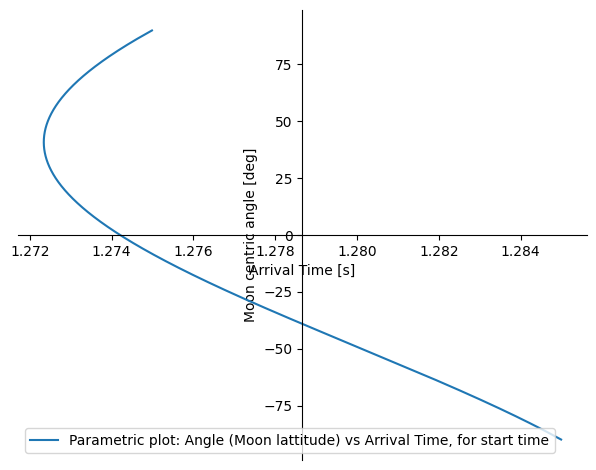

In [98]:
# Parametric plot point angle moon centric, arrival time, with parameter = time
sweepAngleMoon = sweepAngle.evalf(subs=sweepDynamic).evalf(subs=earthMoonSystem).evalf(subs=sweepDynamic)
plot_parametric(arrivalTimeMoon(t), (180.0/pi)*surfaceAngleMoon(sweepAngleMoon(t)), (t, 0, sweepDuration), 
                legend=True,
                label='Parametric plot: Angle (Moon lattitude) vs Arrival Time, for start time',
                xlabel='Arrival Time [s]', ylabel='Moon centric angle [deg]' )
